<a href="https://colab.research.google.com/github/jefmud/mw_image_pipeline1/blob/master/MW_Hartebeest_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving hartebeest_output.csv to hartebeest_output.csv
User uploaded file "hartebeest_output.csv" with length 27723517 bytes


In [4]:
os.listdir('.')

['.config', 'hartebeest_output.csv', 'sample_data']

In [7]:
# load the dataframe into sdf
sdf = pd.read_csv('hartebeest_output.csv')
sdf.head()

,id,label,prediction_top,confidence_top,predictions_all,ID,Species
0,ASG0002zxl,species,hartebeest,0.7227,"{'aardvark': '0.0000', 'aardwolf': '0.0000', '...",4169,hartebeest
1,ASG0002zxl,count,2,0.3889,"{'1': '0.3637', '10': '0.0014', '11-50': '0.00...",4169,hartebeest
2,ASG0002zxl,standing,1,0.5797,"{'0': '0.4203', '1': '0.5797'}",4169,hartebeest
3,ASG0002zxl,resting,0,0.9579,"{'0': '0.9579', '1': '0.0421'}",4169,hartebeest
4,ASG0002zxl,moving,0,0.8915,"{'0': '0.8915', '1': '0.1085'}",4169,hartebeest


In [8]:
# clean up the dataframe to have only species data
sdf = sdf[sdf.label=='species']
sdf.head()

,id,label,prediction_top,confidence_top,predictions_all,ID,Species
0,ASG0002zxl,species,hartebeest,0.7227,"{'aardvark': '0.0000', 'aardwolf': '0.0000', '...",4169,hartebeest
8,ASG0002zxp,species,reedbuck,0.2954,"{'aardvark': '0.0000', 'aardwolf': '0.0001', '...",4172,hartebeest
16,ASG00001ea,species,topi,0.4595,"{'aardvark': '0.0017', 'aardwolf': '0.0016', '...",4466,hartebeest
24,ASG000324g,species,hartebeest,0.9908,"{'aardvark': '0.0000', 'aardwolf': '0.0000', '...",6727,hartebeest
32,ASG0002zzm,species,wildebeest,0.3090,"{'aardvark': '0.0004', 'aardwolf': '0.0004', '...",4202,hartebeest


In [11]:
# show the top ten predictions
topten = sdf.prediction_top.value_counts()[:10]
topten

hartebeest         10706
zebra                283
gazellethomsons      274
wildebeest           240
impala               170
gazellegrants        165
eland                143
topi                  91
lionfemale            60
giraffe               54
Name: prediction_top, dtype: int64

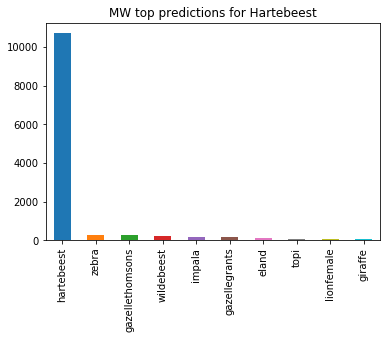

In [14]:
topten.plot.bar(title='MW top predictions for Hartebeest')

In [16]:
# now, lets look at the confidence
sdf.confidence_top.describe()

count    12429.000000
mean         0.860169
std          0.205787
min          0.137400
25%          0.799800
50%          0.972000
75%          0.996300
max          1.000000
Name: confidence_top, dtype: float64

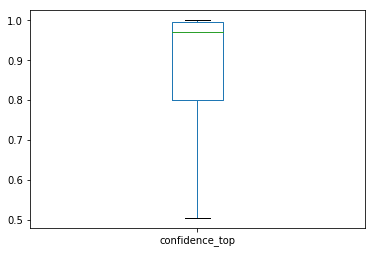

In [17]:
# lets do a nice box plot for the confidence data
sdf.confidence_top.plot.box(showfliers=False)

In [18]:
# suppose we eliminate all predictions that did not turn out to be hartebeest
# what does our confidence look like
hdf = sdf[sdf.prediction_top=='hartebeest']
hdf.confidence_top.describe()

count    10706.000000
mean         0.908624
std          0.153018
min          0.151300
25%          0.898825
50%          0.982500
75%          0.997200
max          1.000000
Name: confidence_top, dtype: float64

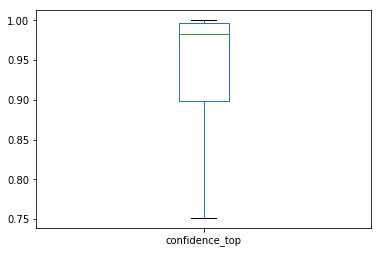

In [20]:
# now, lets do a quick boxplot to see how that works out.
hdf.confidence_top.plot.box(showfliers=False)